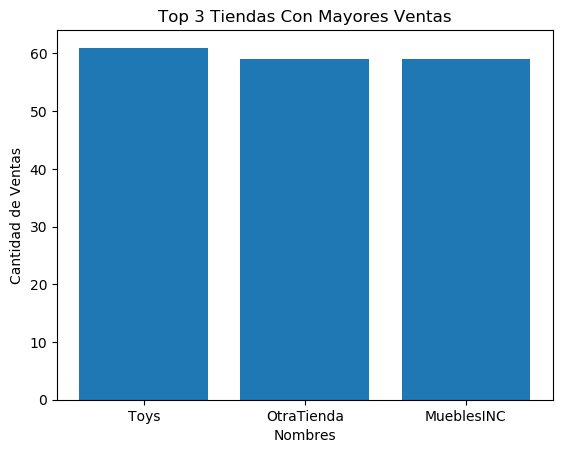

In [77]:
import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute(" SELECT tienda.nombre, COUNT(venta.idtienda) FROM tienda INNER JOIN venta ON tienda.idtienda = venta.idtienda GROUP BY tienda.nombre ORDER BY (count(*)) DESC LIMIT 3;")
data = cur.fetchall()

label = ('Nombre','Ventas')
x = np.arange(len(data))
ventas = []
nombres = []

for val in data:
    ventas.append(val[1])
    nombres.append(val[0])


fig, ax = plt.subplots()

plt.bar(x, ventas)
plt.xticks(x, nombres)

ax.set_xlabel('Nombres')
ax.set_ylabel('Cantidad de Ventas')
ax.set_title('Top 3 Tiendas Con Mayores Ventas')

plt.show() 

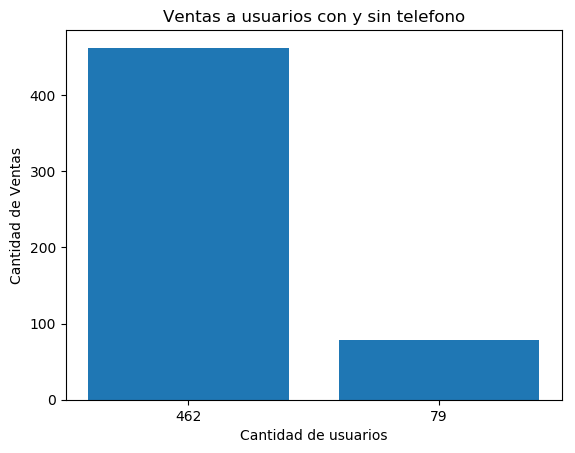

In [30]:
import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute('SELECT count(venta."idVenta") AS cantidad FROM venta GROUP BY (venta.mac IS NULL);')
data = cur.fetchall()

label = ('Con telefono','Sin telefono')
x = np.arange(len(data))
ventas = []
usuarios = []

for val in data:
    ventas.append(val[0])
    usuarios.append(val[0])


fig, ax = plt.subplots()

plt.bar(x, ventas)
plt.xticks(x, usuarios)

ax.set_xlabel('Cantidad de usuarios')
ax.set_ylabel('Cantidad de Ventas')
ax.set_title('Ventas a usuarios con y sin telefono')

plt.show() 

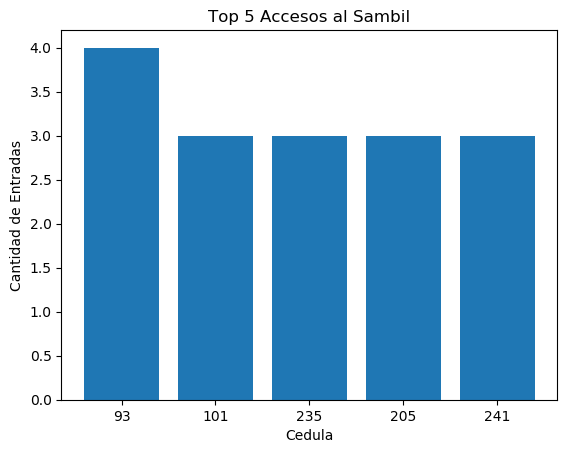

In [81]:
import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute(" SELECT acceso.cedula, COUNT(acceso.cedula) FROM acceso GROUP BY acceso.cedula ORDER BY (count(*)) DESC LIMIT 5;")
data = cur.fetchall()

label = ('Cedula','Cantidad')
x = np.arange(len(data))
cedula = []
cantidad = []

for val in data:
    cantidad.append(val[1])
    cedula.append(val[0])


fig, ax = plt.subplots()

plt.bar(x, cantidad)
plt.xticks(x, cedula)

ax.set_xlabel('Cedula')
ax.set_ylabel('Cantidad de Entradas')
ax.set_title('Top 5 Accesos al Sambil')

plt.show() 

Text(0.5, 1.0, 'Montos totales')

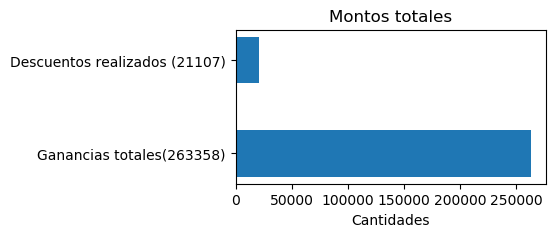

In [2]:
import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
    
myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute('SELECT sum(venta.descuento) AS cantidaddescuentototal, sum(venta.monto) AS montototalvendido FROM venta;')
data = cur.fetchone()
#los descuentos funcionan de manera en que se creo un trigger before insercion que determina
#si el monto de la compra es menor a 400 no da descuento
#entre 400-600 da un descuento de 5% 
#entre 600-800 de 10% 
#de 800-999 da 12% de descuento a la compra
labels=('Descuentos realizados ('+str(data[0])+')','Ganancias totales('+str(data[1])+')')

y_pos = np.arange(len(labels))

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,2))

ax.barh(y_pos, data, height=0.5, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Cantidades')
ax.set_title('Montos totales')

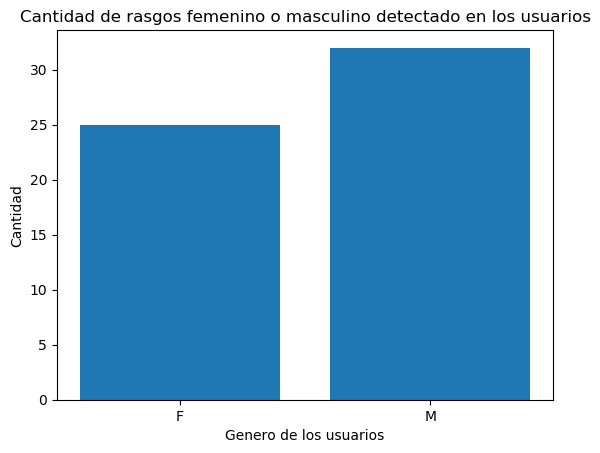

In [33]:
 import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute('SELECT rasgos.sexo, count(rasgos.sexo) FROM rasgos WHERE (rasgos.sexo IS NOT NULL) GROUP BY (rasgos.sexo) ;')
data = cur.fetchall()

label = ('Femenino','Masculino')
x = np.arange(len(data))
f = []
m = []

for val in data:
    f.append(val[1])
    m.append(val[0])


fig, ax = plt.subplots()

plt.bar(x, f)
plt.xticks(x, m)

ax.set_xlabel('Genero de los usuarios')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de rasgos femenino o masculino detectado en los usuarios')

plt.show() 
    

